**Eg7**

Step 1. Import files titles.csv and cast.csv, also the necessary libraries to perform the following

In [19]:
import pandas as pd
import numpy as np

titles = pd.read_csv('titles.csv')
cast = pd.read_csv('cast.csv')
print("titles.csv :")
print(titles)
print(titles.shape)
print("__________________________________________________________________________")
print("cast.csv :")
print(cast)
print(cast.shape)

titles.csv :
                   Title  Year
0  Tomorrow Ends at Dawn  2002
1   Brothers of the West  1937
2                   Nemo  1984
3                Pereezd  2014
4       Bad for Business  2007
5              Inception  2010
(6, 2)
__________________________________________________________________________
cast.csv :
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN
(5, 6)


Q1.How many movies are listed in the titles dataframe?


In [20]:
num_movies = len(titles)
print(f"Number of movies listed: {num_movies}")
#To find unique movies
total_movies = titles['Title'].nunique()
print(f"Total number of movies: {total_movies}")

Number of movies listed: 6
Total number of movies: 6


Q2. What are the earliest two films listed in the titles dataframe?

In [23]:
earliest_two_films = titles.sort_values('Year').head(2)
print("Earliest two films:\n", earliest_two_films)

Earliest two films:
                   Title  Year
1  Brothers of the West  1937
2                  Nemo  1984


Q3. How many movies were made from 1950 through 1959?
Step 2. Import the file chipotle.csv and also the necessary libraries to perform the following
Step 3. Assign it to a variable called chipo.


In [26]:
movies_1950s = titles[(titles['Year'] >= 1950) & (titles['Year'] <= 1959)]
num_movies_1950s = len(movies_1950s)
print(f"Number of movies made from 1950 through 1959: {num_movies_1950s}")

Number of movies made from 1950 through 1959: 0


Step 2. Import the file chipotle.csv and also the necessary libraries to perform the following

Step 3. Assign it to a variable called chipo.

In [29]:
import pandas as pd

chipo = pd.read_csv('chipotle.csv')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Q4.Create a scatterplot with the number of items orderered per order price


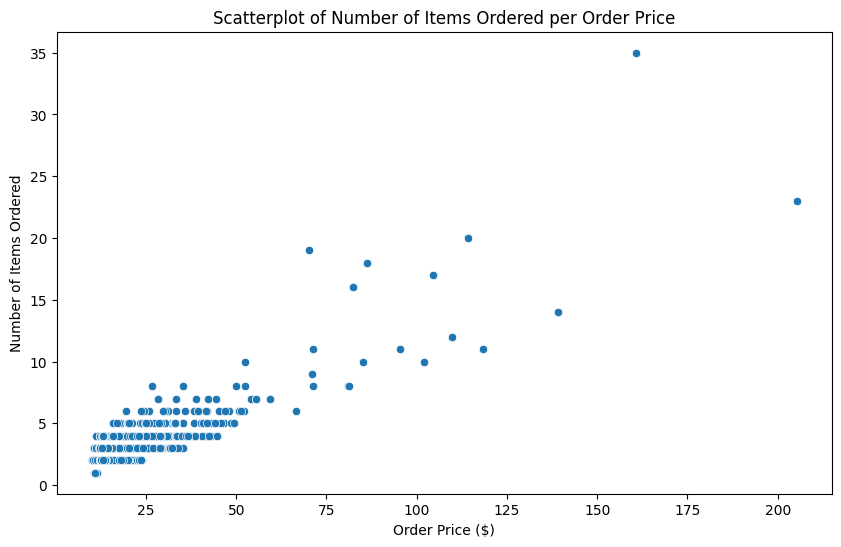

In [33]:
import seaborn as sns
order_summary = chipo.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'sum'})


plt.figure(figsize=(10,6))
sns.scatterplot(x='item_price', y='quantity', data=order_summary)
plt.title("Scatterplot of Number of Items Ordered per Order Price")
plt.xlabel("Order Price ($)")
plt.ylabel("Number of Items Ordered")
plt.show()

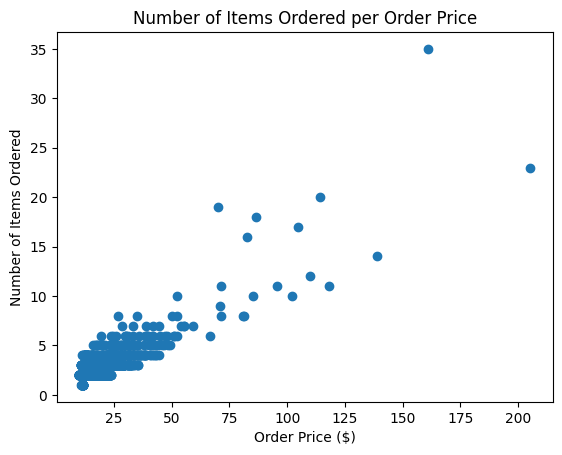

In [31]:
import matplotlib.pyplot as plt

chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
grouped = chipo.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'sum'})

plt.scatter(grouped['item_price'], grouped['quantity'])
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.show()

Q5. What was the quantity of the most expensive item ordered?


In [36]:
most_expensive_order = chipo.loc[chipo['item_price'].idxmax()]
most_expensive_quantity = most_expensive_order['quantity']
print(f"Quantity of the most expensive item ordered: {most_expensive_quantity}")

Quantity of the most expensive item ordered: 15


Q6. For each item_name print the statistics for item_price.


In [39]:
item_price_stats = chipo.groupby('item_name')['item_price'].describe()
print("Statistics for each item_name:")
print(item_price_stats)

Statistics for each item_name:
                                       count       mean           std   min  \
item_name                                                                     
6 Pack Soft Drink                       54.0   6.610185  8.831771e-01  6.49   
Barbacoa Bowl                           66.0  10.187273  1.260994e+00  8.69   
Barbacoa Burrito                        91.0   9.832418  1.139519e+00  8.69   
Barbacoa Crispy Tacos                   11.0  10.928182  2.800739e+00  8.99   
Barbacoa Salad Bowl                     10.0  10.640000  1.317616e+00  9.39   
Barbacoa Soft Tacos                     25.0  10.018400  1.191937e+00  8.99   
Bottled Water                          162.0   1.867654  1.547295e+00  1.09   
Bowl                                     2.0  14.800000  1.046518e+01  7.40   
Burrito                                  6.0   7.400000  9.729507e-16  7.40   
Canned Soda                            104.0   1.320577  5.189381e-01  1.09   
Canned Soft Drink    

Q7. How many times was a Veggie Salad Bowl ordered?


In [40]:
veggie_salad_bowl_orders = chipo[chipo['item_name'] == 'Veggie Salad Bowl']['quantity'].sum()
print(f"Veggie Salad Bowl ordered: {veggie_salad_bowl_orders} times")

Veggie Salad Bowl ordered: 18 times


Q8. How many times did someone order more than one Canned Soda?


In [44]:
canned_soda_orders = chipo[(chipo['item_name'] == 'Canned Soda') & (chipo['quantity'] > 1)].shape[0]
print(f"Number of times more than one Canned Soda was ordered: {canned_soda_orders}")

Number of times more than one Canned Soda was ordered: 20


Q9.How many products cost more than $10.00?


In [45]:
expensive_items = chipo[chipo['item_price'] > 10.00]
num_expensive_items = expensive_items['item_name'].nunique()
print(f"Number of products that cost more than $10.00: {num_expensive_items}")


Number of products that cost more than $10.00: 31


Q10.Print the mean item_price per item_name

In [48]:
mean_item_price = chipo.groupby('item_name')['item_price'].mean()
print(mean_item_price)

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [49]:
mean_item_price

,item_price
item_name,
6 Pack Soft Drink,6.610185
Barbacoa Bowl,10.187273
Barbacoa Burrito,9.832418
Barbacoa Crispy Tacos,10.928182
Barbacoa Salad Bowl,10.640000
Barbacoa Soft Tacos,10.018400
Bottled Water,1.867654
Bowl,14.800000
Burrito,7.400000


END